## Object Detection with Generalized Linear Model: Sign Language


-----
-----

In [1]:
#%% Imports
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', DeprecationWarning)

import os
import urllib.request
import zipfile

import imageio
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from ipywidgets import interact
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle



In [ ]:
#%% Data

fname = '../data/sign-lang.zip'
url   = 'https://github.com/yoavram/Sign-Language/raw/master/Dataset.zip'

if not os.path.exists(fname):
    urllib.request.urlretrieve(url, fname)
print(fname, 'exists:', os.path.exists(fname))

folder = fname.replace('.zip', '')
if not os.path.exists(folder):
    print('Extracting to {}'.format(folder))
    with zipfile.ZipFile(fname) as f:
        f.extractall('../data/')
print(folder, 'exists:', os.path.exists(folder))

../data/sign-lang.zip exists: True
../data/sign-lang exists: True


im.dtype: uint8 
im.shape:(240, 320, 3)
Metadata:


,image,top_left_x,top_left_y,bottom_right_x,bottom_right_y
0,user_3/A0.jpg,124,18,214,108
1,user_3/A1.jpg,124,18,214,108
2,user_3/A2.jpg,123,19,213,109
3,user_3/A3.jpg,122,21,212,111
4,user_3/A4.jpg,122,20,212,110


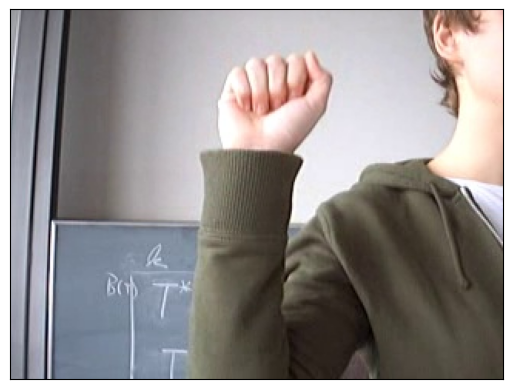

In [12]:
#%% read/Display Image
# [Func]
def open_image(fimg):
    return imageio.imread(fimg)

#[Func]
def display_image(im, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.imshow(im)
    ax.set(xticks=[], yticks=[])
    return ax

#[Func]
def open_metadata(fname):
    return pd.read_csv(fname)

#_____________________________________________
im = open_image(os.path.join(folder, 'user_3', 'A0.jpg'))
print(f"im.dtype: {im.dtype} \nim.shape:{im.shape}")
display_image(im);

metadata_fname = os.path.join(folder, 'user_3', 'user_3_loc.csv')
metadata = open_metadata(metadata_fname)
print('Metadata:')
metadata.head()